## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

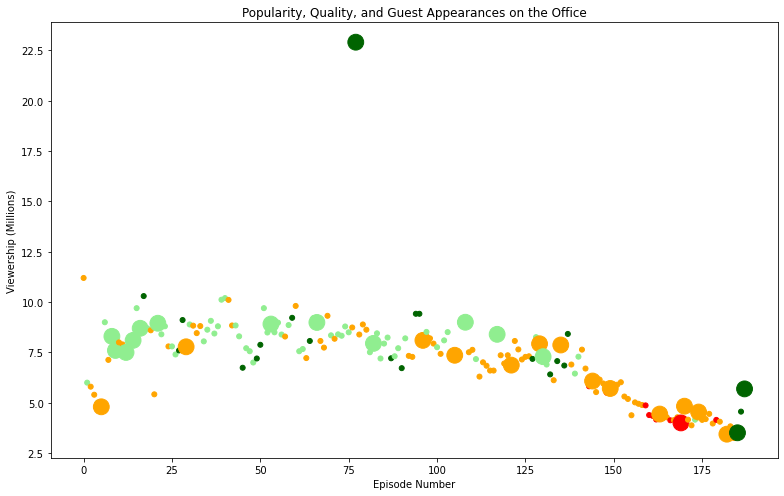

In [40]:
# Use this cell to begin your analysis, and add as many as you would like!
# import pandas library for data cleaning and wrangling
# import matplotlib.pyplot for visualisation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(11,7))

# import dataset
# view first 5 rows of data set
office_episodes_df = pd.read_csv("datasets/office_episodes.csv")
office_episodes_df.head()

# create a matplotlib scatter plot for
# episode number
# and viewership
# iterate over office episodes to 
# imput colors for ratings

# create color scheme
ratings_color_scheme = []

# iterate over office episodes
# add colour to ratings
# <0.25 color red
# >=0.25 and <0.50 color orange
# >=0.50 and <0.75 color lightgreen
# <0.25 color darkgreen

for index, row in office_episodes_df.iterrows():
    if row["scaled_ratings"] < 0.25:
        ratings_color_scheme.append("red")
    elif 0.25 <= row["scaled_ratings"] < 0.50:
        ratings_color_scheme.append("orange")
    elif 0.50 <= row["scaled_ratings"] < 0.75:
        ratings_color_scheme.append("lightgreen")
    else:
         ratings_color_scheme.append("darkgreen")
            
            
# create marker sizes for guest apperances

guest_sizing_system = []

# iterate over office episodes
# 250 guest apperance in episode
# 25 no guest apperance in episode

for index, row in office_episodes_df.iterrows():
    if row["has_guests"] == True:
        guest_sizing_system.append(250)
    else:
        guest_sizing_system.append(25)    

        
# plot scatterplot 
# viewership in millions against
# episode number

plt.scatter(office_episodes_df["episode_number"], office_episodes_df["viewership_mil"], 
            c=ratings_color_scheme, s=guest_sizing_system)

# set title for scatterplot
plt.title("Popularity, Quality, and Guest Appearances on the Office")

# set axes labels for scatterplot
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")

# show plot
plt.show()

In [41]:
# provide the name of one of
# the guest stars
# in the most watched office episode

# create variable for most watched 
# office episode
most_watched_office_episode = office_episodes_df[office_episodes_df["viewership_mil"]\
                    == office_episodes_df["viewership_mil"].max()]

most_watched_office_episode 

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
77,77,5,Stress Relief,Dwight's too-realistic fire alarm gives Stanle...,9.7,8170,22.91,60,2009-02-01,"Cloris Leachman, Jack Black, Jessica Alba",Jeffrey Blitz,Paul Lieberstein,True,0.96875


In [42]:
# Name of one of the guest stars 
# on the most watched office episode

top_star = "Jessica Alba"

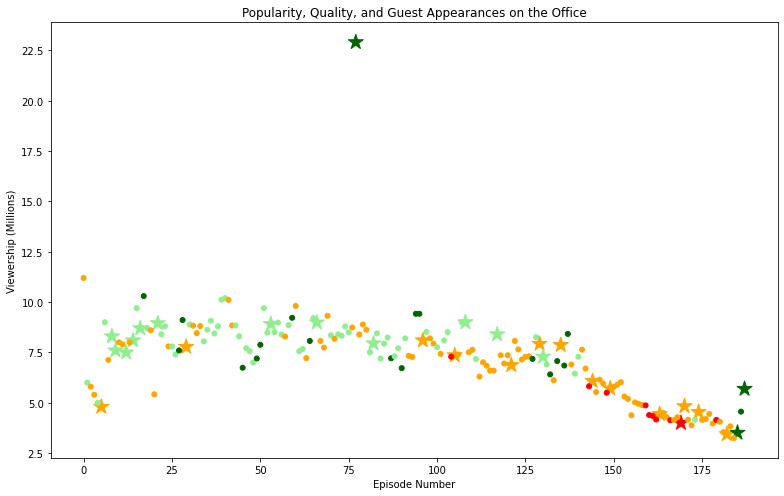

In [43]:
# dataset for office episodes with guests
episodes_with_guests = office_episodes_df[office_episodes_df["has_guests"]==True]
                                         
# dataset for office episodes without guests
episodes_without_guests = office_episodes_df[office_episodes_df["has_guests"]==False]

# create a matplotlib scatter plot for
# episode number
# and viewership
# iterate over office episodes to 
# input colors for ratings

# create color scheme
ratings_color_scheme_guest = []

# iterate over office episodes
# add colour to ratings
# <0.25 color red
# >=0.25 and <0.50 color orange
# >=0.50 and <0.75 color lightgreen
# <0.25 color darkgreen

# episodes with guest appearances
for index, row in episodes_with_guests.iterrows():
    if row["scaled_ratings"] < 0.25:
        ratings_color_scheme_guest.append("red")
    elif 0.25 <= row["scaled_ratings"] < 0.50:
        ratings_color_scheme_guest.append("orange")
    elif 0.50 <= row["scaled_ratings"] < 0.75:
        ratings_color_scheme_guest.append("lightgreen")
    else:
         ratings_color_scheme_guest.append("darkgreen")
            
# create color scheme
ratings_color_scheme_noguest = []
# episodes without guest appearances
for index, row in episodes_without_guests.iterrows():
    if row["scaled_ratings"] < 0.25:
        ratings_color_scheme_noguest.append("red")
    elif 0.25 <= row["scaled_ratings"] < 0.50:
        ratings_color_scheme_noguest.append("orange")
    elif 0.50 <= row["scaled_ratings"] < 0.75:
        ratings_color_scheme_noguest.append("lightgreen")
    else:
         ratings_color_scheme_noguest.append("darkgreen")
            
# create marker sizes for guest apperances
# 250 guest apperance in episode
# 25 no guest apperance in episode

# distinguish guest appearence by different markers
# "*" for guest apperance in episode
# "o" for no guest apperance in episode
     
        
# plot scatterplot 
# viewership in millions against
# episode number
fig = plt.figure(figsize=(11,7))

plt.scatter(episodes_with_guests["episode_number"], episodes_with_guests["viewership_mil"], 
            c=ratings_color_scheme_guest, s=250, marker="*")

plt.scatter(episodes_without_guests["episode_number"], episodes_without_guests["viewership_mil"], 
            c=ratings_color_scheme_noguest, s=25, marker="o")


# set title for scatterplot
plt.title("Popularity, Quality, and Guest Appearances on the Office")

# set axes labels for scatterplot
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")

# show plot
plt.show()